## <center> Importing the Dependencies </center>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import os

import warnings
warnings.filterwarnings('ignore')

## <center> Data Collection and Processing </center>

In [ ]:
# loading the csv data to a Pandas DataFrame
db_data = pd.read_csv('diabetes.csv')

In [ ]:
# print first 5 rows of the dataset
db_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# print last 5 rows of the dataset
db_data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
# number of rows and columns in the dataset
db_data.shape

(768, 9)

In [ ]:
# getting some info about the data
db_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# checking for missing values
db_data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
# statistical measures about the data
db_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# checking the distribution of Outcome Variable
db_data['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


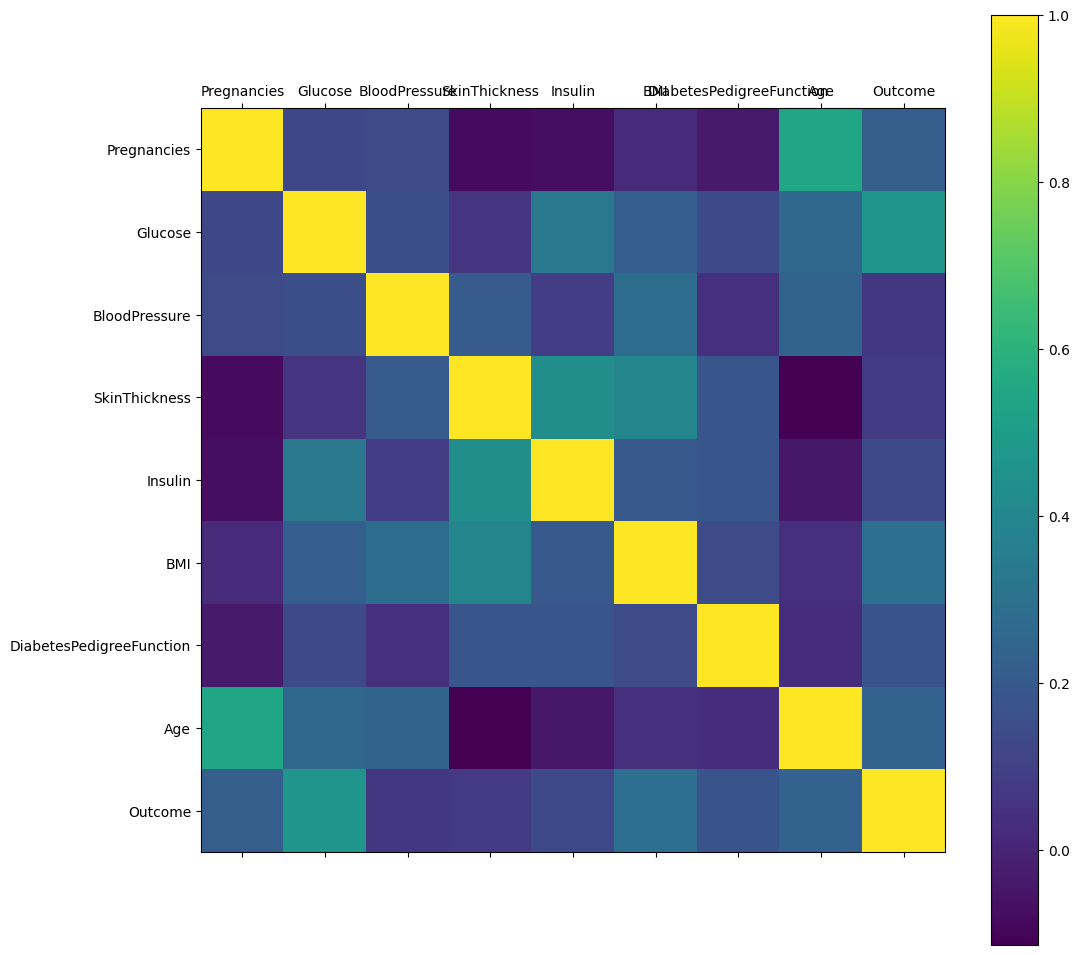

In [ ]:
from matplotlib import rcParams
from matplotlib.pyplot import matshow

rcParams['figure.figsize'] = 18,12
plt.matshow(db_data.corr())
plt.yticks(np.arange(db_data.shape[1]), db_data.columns)
plt.xticks(np.arange(db_data.shape[1]), db_data.columns)
plt.colorbar()

Outcome
0    500
1    268
Name: count, dtype: int64


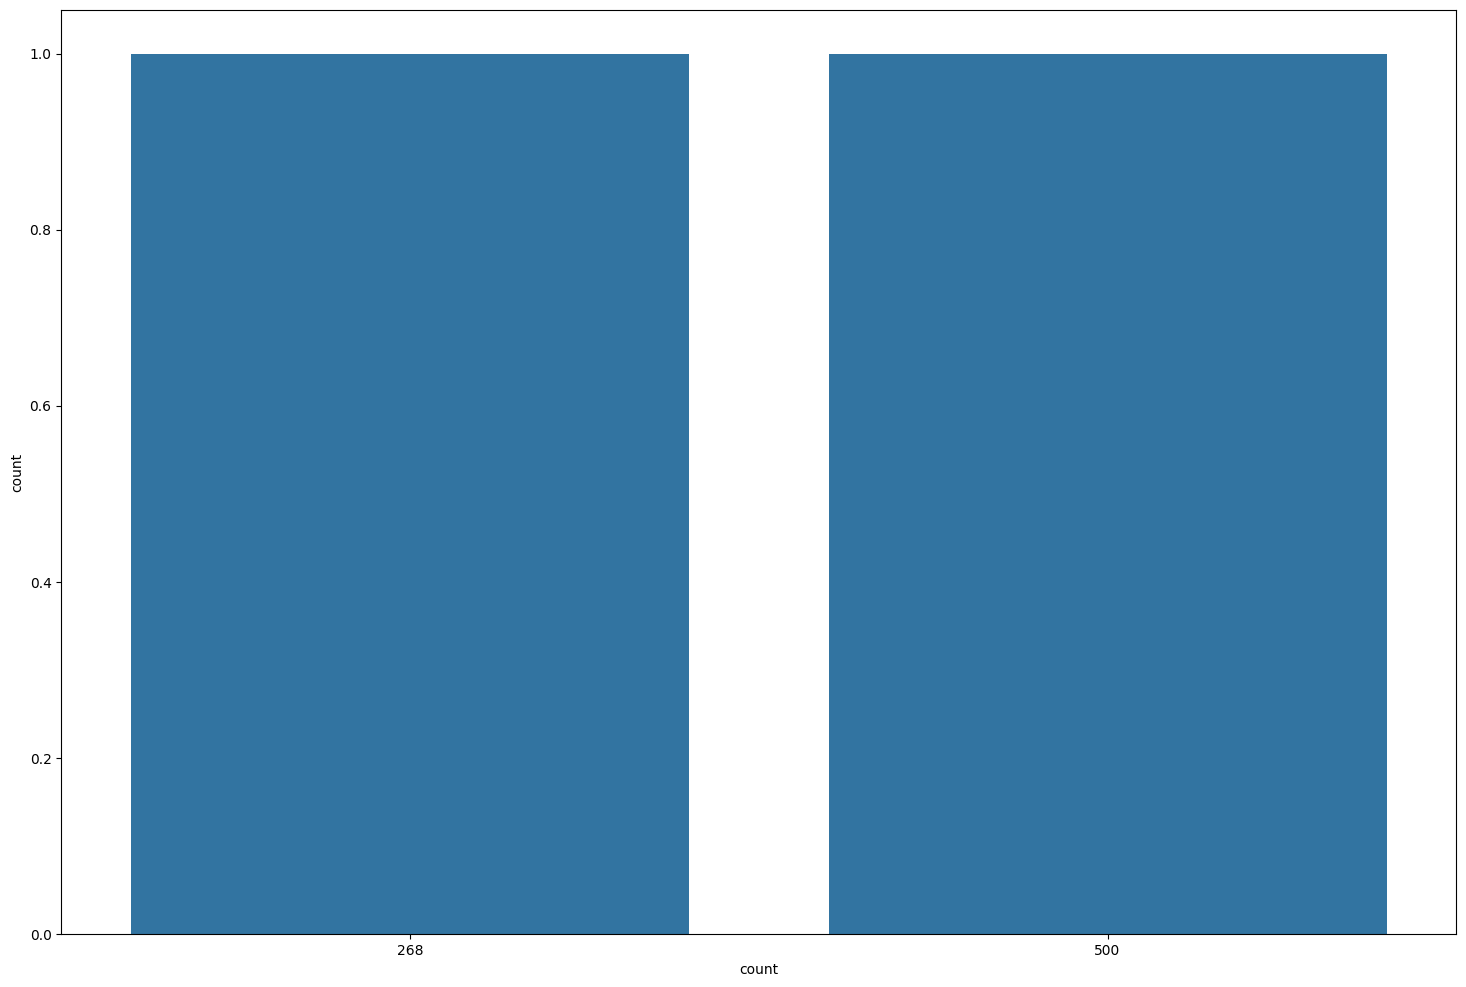

In [ ]:
#data visualization for db disease patients
y = db_data["Outcome"]
Outcome_temp = db_data.Outcome.value_counts()

sns.countplot(x=Outcome_temp)
print(Outcome_temp)

- 1 --> Defective db

- 0 --> Healthy db

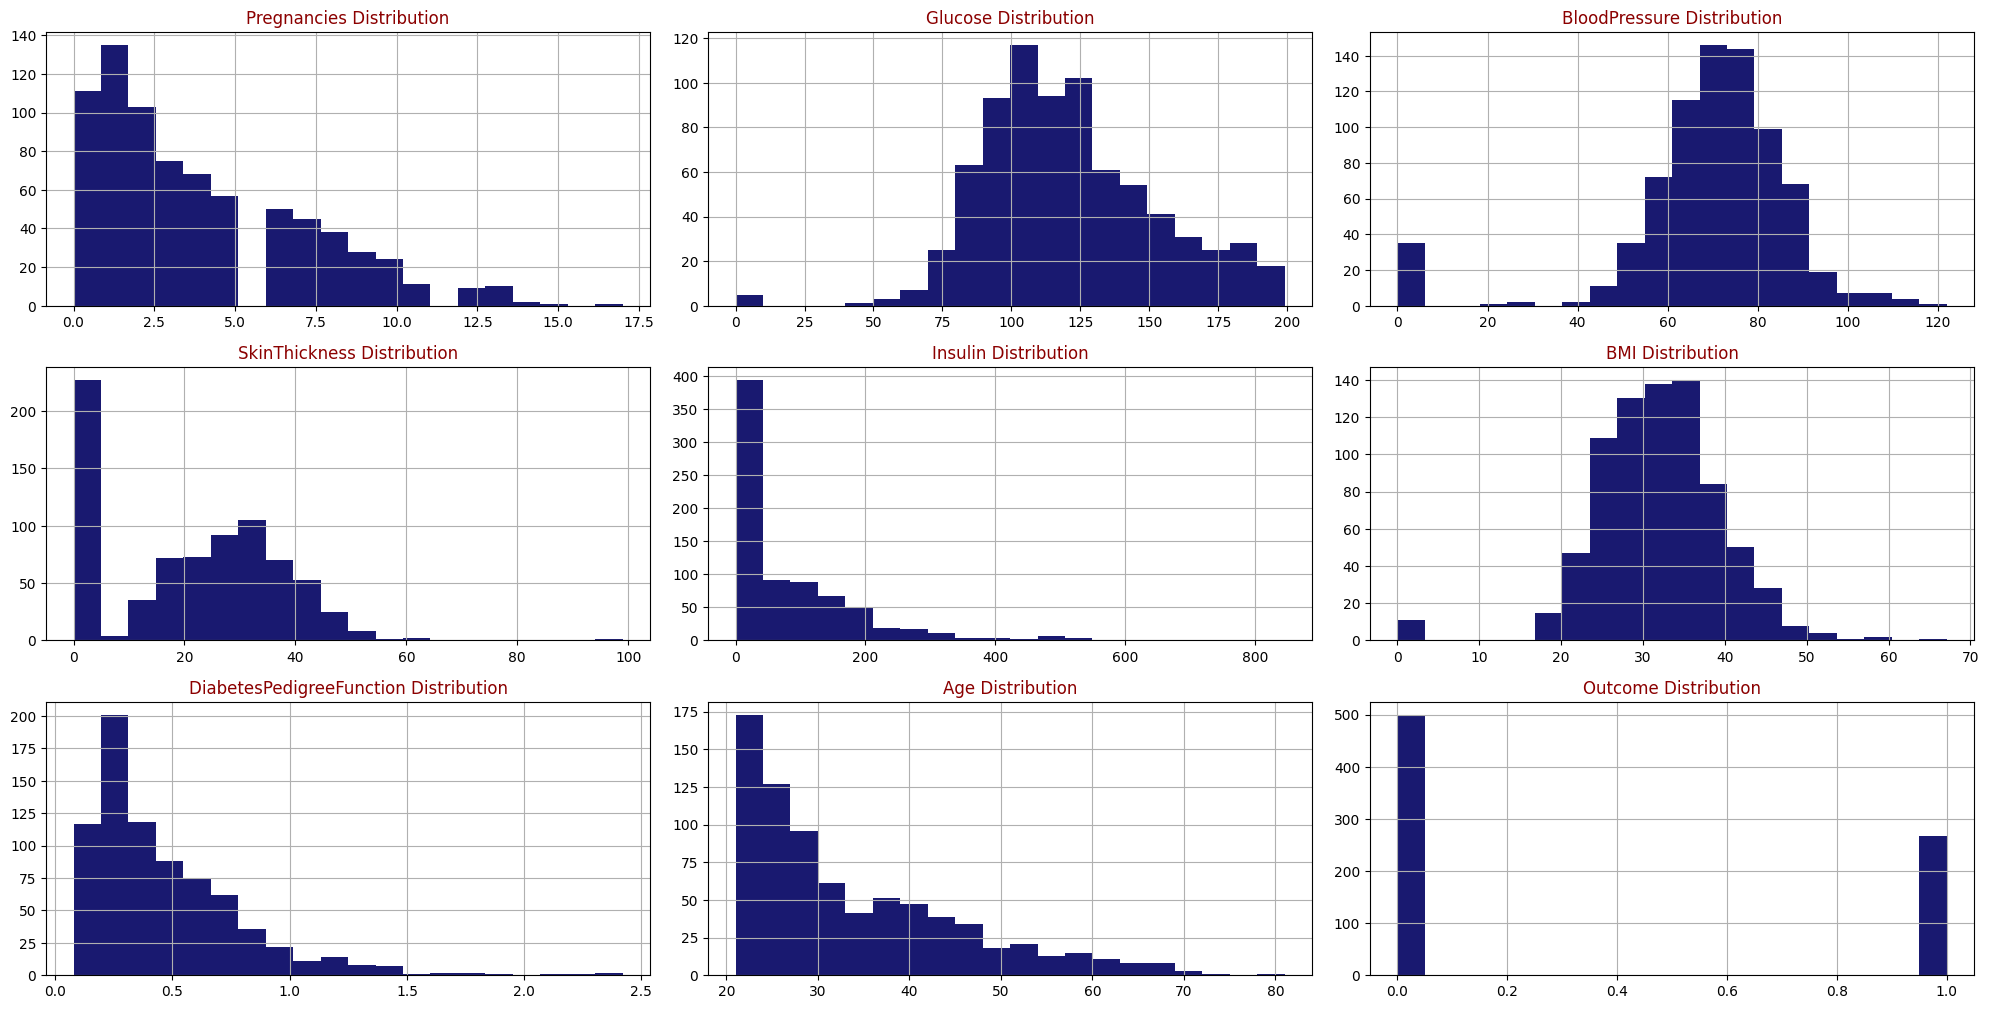

In [ ]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')

    fig.tight_layout()
    plt.show()
draw_histograms(db_data,db_data.columns,6,3)

## <center> Splitting the Features and Outcome </center>

In [ ]:
X = db_data.drop(columns='Outcome', axis=1)
Y = db_data['Outcome']

In [ ]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [ ]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


## <center> Splitting the Data into Training data & Test Data </center>

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


# <center> Model Training </center>

##  Logistic Regression

In [ ]:
class LogisticRegression:
    def __init__(self, learning_rate=0.1, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        num_samples, num_features = X.shape
        # Initialize weights and bias
        self.weights = np.zeros(num_features)
        self.bias = 0

        # Gradient descent
        for _ in range(self.num_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            # Compute gradients
            dw = (1 / num_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / num_samples) * np.sum(y_predicted - y)

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        # Convert probabilities to binary output
        y_predicted_class = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_class)

In [ ]:
# training the LogisticRegression model with Training data
model1 = LogisticRegression(learning_rate=0.01, num_iterations=1000)
model1.fit(X_train,Y_train)

##  Random Forest

In [ ]:

rf=RandomForestClassifier(random_state=100)
rf.fit(X_train,Y_train)
Y_pred_rf=rf.predict(X_test)


## <center> Model Evaluation </center>

### Accuracy Score and Classification Report

## Logistic Regression

In [ ]:
# accuracy on training data
X_train_prediction = model1.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.6514657980456026


In [ ]:
# accuracy on test data
X_test_prediction = model1.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.6493506493506493


In [ ]:
score_lr = round(accuracy_score(X_test_prediction, Y_test)*100,2)
print("The accuracy score achieved using Linear Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Linear Regression is: 64.94 %


In [ ]:
# performance evaluation metrics
print(classification_report(X_test_prediction, Y_test))

              precision    recall  f1-score   support

           0       1.00      0.65      0.79       154
           1       0.00      0.00      0.00         0

    accuracy                           0.65       154
   macro avg       0.50      0.32      0.39       154
weighted avg       1.00      0.65      0.79       154



## <center> Saving Model </center>


In [ ]:
import pickle

In [ ]:
with open('db_lr.pkl', 'wb') as model_file:
    pickle.dump(model1, model_file)

print("Model saved to db_lr.pkl")


Model saved to db_lr.pkl


##  Random Forest

In [ ]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Random Forest is: "+str(score_rf)+" %")

The accuracy score achieved using Random Forest is: 74.68 %


In [ ]:
# accuracy on train data
rf_train_prediction = rf.predict(X_train)
training_data_accuracy = accuracy_score(rf_train_prediction, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  1.0


In [ ]:
# accuracy on test data
rf_test_prediction = rf.predict(X_test)
test_data_accuracy = accuracy_score(rf_test_prediction, Y_test)
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.7467532467532467


In [ ]:
# performance evaluation metrics
print(classification_report(rf_test_prediction, Y_test))

              precision    recall  f1-score   support

           0       0.87      0.77      0.82       113
           1       0.52      0.68      0.59        41

    accuracy                           0.75       154
   macro avg       0.69      0.73      0.70       154
weighted avg       0.78      0.75      0.76       154



## <center> Saving Model </center>


In [ ]:
import pickle

In [ ]:
with open('db_rf.pkl', 'wb') as model_file:
    pickle.dump(rf, model_file)

print("Model saved to db_rf.pkl")


Model saved to db_rf.pkl
